In [11]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [12]:
import cv2
import os, glob, numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf

img_dir = './categorical_binary_cnn/test'
categories = ['bill', 'coin', 'general_product', 'graph', 'human', 'lotto_N',
             'lotto_P', 'microbe', 'part_of_human', 'photoshop', 'picture', 'non_ad']


image_width = 140 # 사이즈 수정
image_height = 140

X = []
y = []
y_bi = []
index = []
cat_index = []
files = []
filenames = []

for i, category in enumerate(categories):
    img_detail = os.path.join(img_dir, category)
    files.append(glob.glob(img_detail + "/*.jpg"))
    index.append(i)
 
    
for file, i in zip(files, index):
    for f in file:
        label = [0 for r in range(len(categories))]
        label[i] = 1
        
        img = data_generator(f, image_width, image_height)
        data = np.asarray(img)

        head, tail = os.path.split(f)
        filenames.append(tail)
        
        X.append(data)
        y.append(label)
        
        if i in range(11):
            y_bi.append(0)
        else:
            y_bi.append(1)

    
X = np.array(X)
y = np.array(y)
y_bi = np.array(y_bi)

X = X.astype('float32') / 255

print(len(X), len(y), len(y_bi))

"""인자 바꾸기"""



639 639 639


'인자 바꾸기'

In [13]:
def print_binary_scores(y_bi, binary_prediction):
    
    print('##################카테고리를 통한 이진 분류 결과 ##############')
    print('confusion matrix 결과')
    print(confusion_matrix(y_bi, binary_prediction, labels=[0, 1])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y_bi, binary_prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y_bi, binary_prediction, average=None) * 100)))

    #print('evaluate값')
    #print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y_bi, binary_prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y_bi, binary_prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y_bi, binary_prediction, average='macro') * 100))
    
    print('##################카테고리를 통한 이진 분류 결과 ##############')

In [14]:
def print_cat_scores(X, y, prediction):
    
    print('################## 다중 분류 결과 ###################')
    #print('confusion matrix 결과')
    #print(multilabel_confusion_matrix(y.argmax(axis=1), prediction, labels=[0 for r in range(12)])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y.argmax(axis=1), prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y.argmax(axis=1), prediction, average=None) * 100)))

    print('evaluate값')
    print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y.argmax(axis=1), prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y.argmax(axis=1), prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y.argmax(axis=1), prediction, average='macro') * 100))
    
    print('################## 다중 분류 결과 ###################')

In [23]:
import keras.backend.tensorflow_backend as K

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

"""수정 필요한 부분"""

# validation_rate = [0.05, 0.1, 0.15, 0.2]  # 리스트 바꾸기
#image_size = [32, 40, 50, 64, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
  #           190, 200, 210, 220, 230, 240, 256]

#model_layers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
#batch_list = [2, 4, 8, 16, 32, 64, 128, 256, 512]
#epochs = [30,35, 40, 45, 50, 55, 60]

#learning_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
#                 0.009, 0.01, 0.011, 0.012, 0.015, 0.02]

#Dropout = [0.15]

optimizer = ['adam', 'sgd', 'adagrad', 'rmsprop', 'nadam']

model_evaluate = []

bi_f1 = []
bi_precision = []
bi_recall = []

cat_f1 = []
cat_precision = []
cat_recall = []



for op in optimizer: #반복문 요소 바꾸기
    binary_prediction = []
    ind = []
    model = load_model('./categorical_binary_cnn/models/optimizer/categorical_binary_model_saved' + str(op) + '.h5')
    ##############파일 인자 수정하기 ##############
    with K.tf_ops.device('/device:GPU:0'):
        prediction = model.predict(X)
        
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
    
    #print(prediction)
    
    for p in prediction:
        ind.append(p.argmax())
        
        if p.argmax() in range(11):
            binary_prediction.append(0)
        else:
            binary_prediction.append(1)
    
    prediction = ind
    
    #print('예측값: ', prediction)
              
    print('옵티마이저 : ' + str(op)) ####### 수정
    print_cat_scores(X, y, prediction)
    print_binary_scores(y_bi, binary_prediction)
    
    
    bi_precision.append(precision_score(y_bi, binary_prediction, average='macro') * 100)
    bi_recall.append(recall_score(y_bi, binary_prediction, average='macro') * 100)
    bi_f1.append(f1_score(y_bi, binary_prediction, average='macro') * 100)
    
    model_evaluate.append(model.evaluate(X, y)[1] * 100)
    cat_precision.append(precision_score(y.argmax(axis=1), prediction, average='macro') * 100)
    cat_recall.append(recall_score(y.argmax(axis=1), prediction, average='macro') * 100)
    cat_f1.append(f1_score(y.argmax(axis=1), prediction, average='macro') * 100)
    
"""수정 필요한 부분"""

옵티마이저 : adam
################## 다중 분류 결과 ###################
precision 개별값
['14.58%', '36.67%', '10.53%', '29.03%', '12.50%', '0.00%', '40.00%', '10.42%', '44.83%', '16.18%', '10.00%', '88.06%']
recall 개별값
['24.14%', '37.93%', '48.28%', '31.03%', '13.79%', '0.00%', '20.69%', '17.24%', '44.83%', '37.93%', '17.24%', '36.88%']
evaluate값
639/639 [==============================] - 2s 3ms/sample - loss: 4.8732 - acc: 0.3177
31.77%
f1 점수
24.02%
precision 평균값
26.07%
recall 평균값
27.50%
################## 다중 분류 결과 ###################
##################카테고리를 통한 이진 분류 결과 ##############
confusion matrix 결과
[[303  16]
 [202 118]]
precision 개별값
['60.00%', '88.06%']
recall 개별값
['94.98%', '36.88%']
f1 점수
62.76%
precision 평균값
74.03%
recall 평균값
65.93%
##################카테고리를 통한 이진 분류 결과 ##############
639/639 [==============================] - 1s 901us/sample - loss: 4.8732 - acc: 0.3177
옵티마이저 : sgd
################## 다중 분류 결과 ###################
precision 개별값
['20.99%', '43.90%', '12.61%', '25.00%', '12.

'수정 필요한 부분'

In [24]:
print(binary_prediction)
print(y_bi)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

In [25]:
#for i, pred in enumerate(prediction):
 #   if pred >= 0.5: print("해당 " + filenames[i] + "  이미지는 비광고 로 추정됩니다.")
  #  else : print("해당 " + filenames[i] + "  이미지는 광고 로 추정됩니다.")

'수정 필요한 부분'

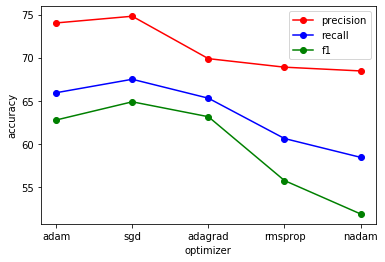

In [26]:
import matplotlib.pyplot as plt

"""이진 카테고리 분류"""

"""수정 필요한 부분"""

plt.plot(optimizer, bi_precision, 'ro-', label='precision') # 리스트 수정
plt.plot(optimizer, bi_recall, 'bo-', label='recall')
plt.plot(optimizer, bi_f1, 'go-', label='f1')
#plt.plot(optimizer, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('optimizer') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""

'수정 필요한 부분'

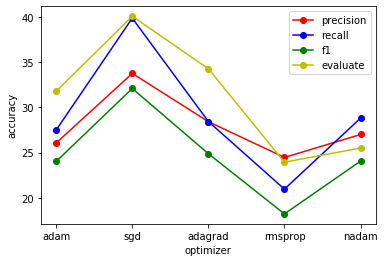

In [27]:
import matplotlib.pyplot as plt

"""카테고리 분류 """

"""수정 필요한 부분"""

plt.plot(optimizer, cat_precision, 'ro-', label='precision') # 리스트 수정
plt.plot(optimizer, cat_recall, 'bo-', label='recall')
plt.plot(optimizer, cat_f1, 'go-', label='f1')
plt.plot(optimizer, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('optimizer') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""